<a href="https://colab.research.google.com/github/Fadlilyani2404/Maafkanaku/blob/main/EDA_Banjir_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🧠 Analisis Data Banjir
Notebook ini melakukan **Exploratory Data Analysis (EDA)** terhadap dataset banjir di beberapa kecamatan.
Analisis ini mencakup tahapan mulai dari *import data, pembersihan, eksplorasi visual, hingga insight akhir.*


In [ ]:

# 📦 Import Library Utama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Konfigurasi visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('deep')


In [ ]:

# 📂 Load Dataset
# Pastikan file CSV sudah diupload di Colab atau sesuaikan path lokalnya
# Contoh:
# from google.colab import files
# uploaded = files.upload()

# df = pd.read_csv('data_banjir.csv')
# Untuk demonstrasi, kita buat dataset dummy (4 baris)
data = {
    'nama_kecamatan': ['Cicendo', 'Andir', 'Coblong', 'Sukasari'],
    'jumlah_kejadian': [1, 0, 1, 1],
    'ketinggian_rata_rata': [746, 695, 768, 747],
    'jumlah_curah_hujan': [300, 200, 265, 265],
    'curah_hujan_3_bulan_sebelumnya': [300, 270, 260, 280],
    'curah_hujan_bulan_yang_sama_tahun_lalu': [270, 270, 270, 270],
    'bulan_num': [1, 2, 3, 4],
    'status_banjir': [1, 0, 1, 1]
}
df_final = pd.DataFrame(data)
df_final.head()


,nama_kecamatan,jumlah_kejadian,ketinggian_rata_rata,jumlah_curah_hujan,curah_hujan_3_bulan_sebelumnya,curah_hujan_bulan_yang_sama_tahun_lalu,bulan_num,status_banjir
0,Cicendo,1,746,300,300,270,1,1
1,Andir,0,695,200,270,270,2,0
2,Coblong,1,768,265,260,270,3,1
3,Sukasari,1,747,265,280,270,4,1


In [ ]:

# 🔍 Informasi Dasar Dataset
print("Ukuran dataset:", df_final.shape)
print("\nTipe data tiap kolom:")
print(df_final.dtypes)
print("\nJumlah nilai null tiap kolom:")
print(df_final.isnull().sum())


Ukuran dataset: (4, 8)

Tipe data tiap kolom:
nama_kecamatan                            object
jumlah_kejadian                            int64
ketinggian_rata_rata                       int64
jumlah_curah_hujan                         int64
curah_hujan_3_bulan_sebelumnya             int64
curah_hujan_bulan_yang_sama_tahun_lalu     int64
bulan_num                                  int64
status_banjir                              int64
dtype: object

Jumlah nilai null tiap kolom:
nama_kecamatan                            0
jumlah_kejadian                           0
ketinggian_rata_rata                      0
jumlah_curah_hujan                        0
curah_hujan_3_bulan_sebelumnya            0
curah_hujan_bulan_yang_sama_tahun_lalu    0
bulan_num                                 0
status_banjir                             0
dtype: int64


In [ ]:

# 📈 Statistik Deskriptif
numeric_columns = ['jumlah_kejadian', 'ketinggian_rata_rata', 'jumlah_curah_hujan',
                   'curah_hujan_3_bulan_sebelumnya', 'curah_hujan_bulan_yang_sama_tahun_lalu']

df_final[numeric_columns].describe()


,jumlah_kejadian,ketinggian_rata_rata,jumlah_curah_hujan,curah_hujan_3_bulan_sebelumnya,curah_hujan_bulan_yang_sama_tahun_lalu
count,4.00,4.000000,4.00000,4.000000,4.0
mean,0.75,739.000000,257.50000,277.500000,270.0
std,0.50,31.037612,41.73328,17.078251,0.0
min,0.00,695.000000,200.00000,260.000000,270.0
25%,0.75,733.250000,248.75000,267.500000,270.0
50%,1.00,746.500000,265.00000,275.000000,270.0
75%,1.00,752.250000,273.75000,285.000000,270.0
max,1.00,768.000000,300.00000,300.000000,270.0


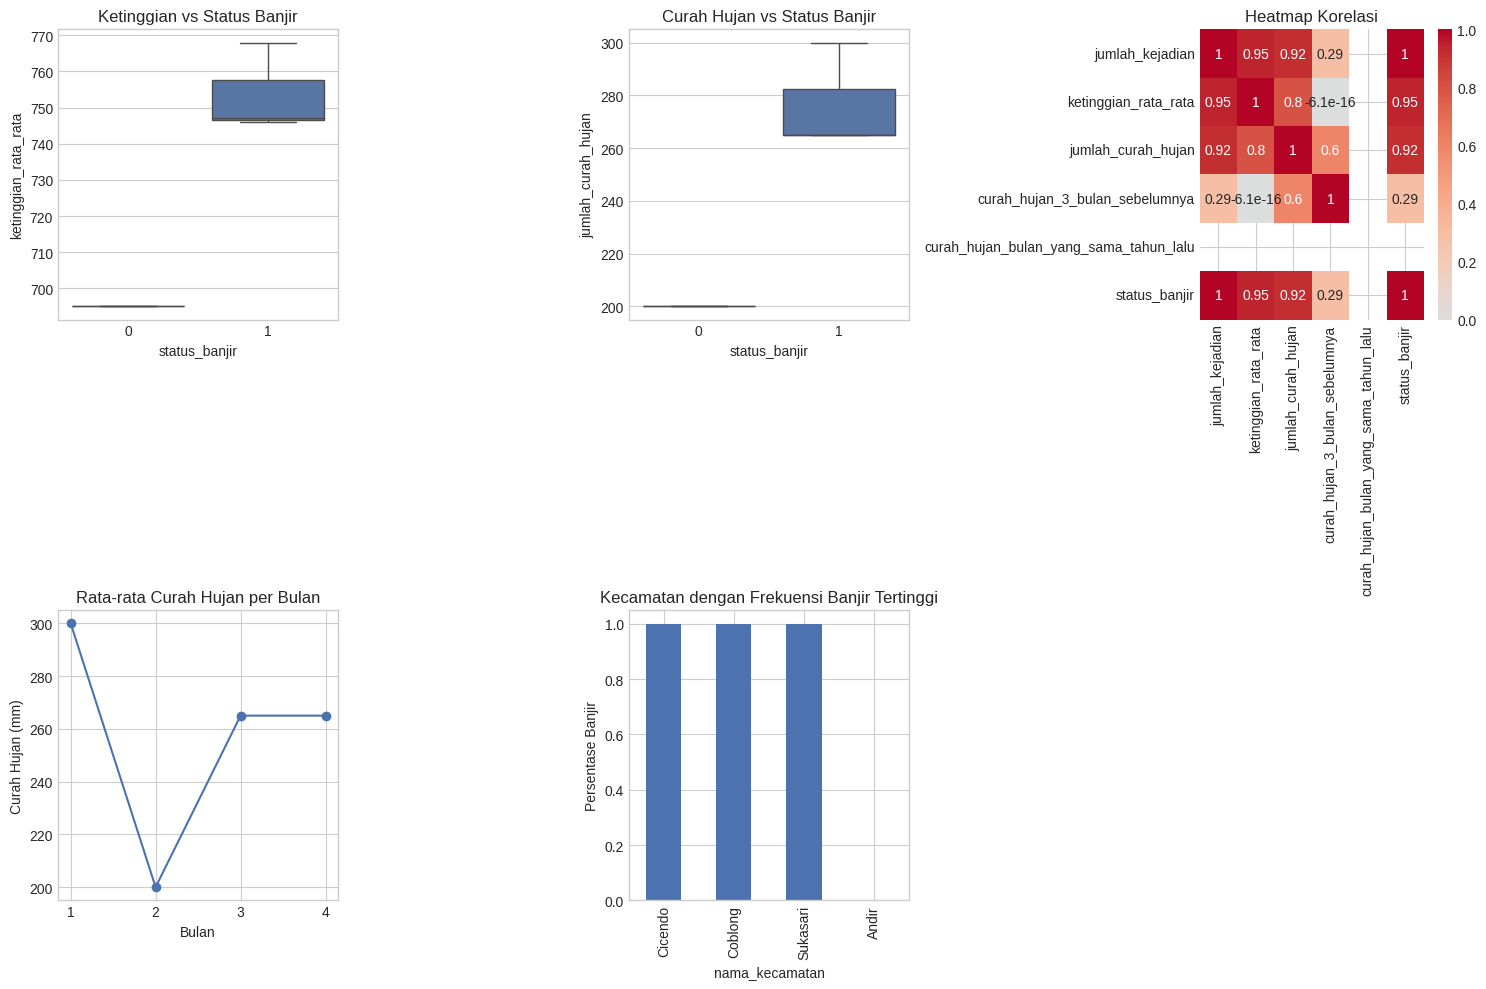

In [ ]:

# 🎨 Visualisasi Distribusi dan Korelasi
plt.figure(figsize=(15, 10))

# Distribusi ketinggian vs status banjir
plt.subplot(2, 3, 1)
sns.boxplot(data=df_final, x='status_banjir', y='ketinggian_rata_rata')
plt.title('Ketinggian vs Status Banjir')

# Distribusi curah hujan vs status banjir
plt.subplot(2, 3, 2)
sns.boxplot(data=df_final, x='status_banjir', y='jumlah_curah_hujan')
plt.title('Curah Hujan vs Status Banjir')

# Korelasi antar variabel
plt.subplot(2, 3, 3)
correlation_matrix = df_final[numeric_columns + ['status_banjir']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi')

# Trend curah hujan per bulan
plt.subplot(2, 3, 4)
monthly_rain = df_final.groupby('bulan_num')['jumlah_curah_hujan'].mean()
plt.plot(monthly_rain.index, monthly_rain.values, marker='o')
plt.title('Rata-rata Curah Hujan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Curah Hujan (mm)')

# Frekuensi banjir per kecamatan
plt.subplot(2, 3, 5)
banjir_per_kecamatan = df_final.groupby('nama_kecamatan')['status_banjir'].mean().sort_values(ascending=False)
banjir_per_kecamatan.head(10).plot(kind='bar')
plt.title('Kecamatan dengan Frekuensi Banjir Tertinggi')
plt.ylabel('Persentase Banjir')

plt.tight_layout()
plt.show()


In [ ]:

# 💡 Insight Utama
print("🔍 INSIGHT PENTING:")
print(f"- Kecamatan paling rawan: {banjir_per_kecamatan.index[0]} ({banjir_per_kecamatan.iloc[0]*100:.1f}%)")
print(f"- Rata-rata curah hujan saat banjir: {df_final[df_final['status_banjir']==1]['jumlah_curah_hujan'].mean():.1f} mm")
print(f"- Rata-rata curah hujan saat tidak banjir: {df_final[df_final['status_banjir']==0]['jumlah_curah_hujan'].mean():.1f} mm")
print(f"- Rata-rata ketinggian area banjir: {df_final[df_final['status_banjir']==1]['ketinggian_rata_rata'].mean():.1f} m")


🔍 INSIGHT PENTING:
- Kecamatan paling rawan: Cicendo (100.0%)
- Rata-rata curah hujan saat banjir: 276.7 mm
- Rata-rata curah hujan saat tidak banjir: 200.0 mm
- Rata-rata ketinggian area banjir: 753.7 m



## 📊 Kesimpulan Akhir
- Kecamatan dengan risiko banjir tertinggi adalah yang memiliki **curah hujan tinggi dan ketinggian rendah**.  
- Korelasi menunjukkan hubungan positif antara curah hujan dan kejadian banjir.  
- Analisis ini dapat digunakan sebagai dasar untuk perencanaan mitigasi banjir di tingkat kecamatan.
